# Task
Apply various image segmentation techniques, including global, local, and adaptive thresholding, and K-Means (with k=2, 3, 4) and Mean Shift segmentation, to the image "flower.jfif". Visualize the original image and all segmented results, then discuss the strengths of each method.

## Load Image

### Subtask:
Load the image 'flower.jfif' and convert it to a suitable format for processing.


**Reasoning**:
First, I need to import the necessary libraries, OpenCV for image loading and processing, and Matplotlib for displaying the image. Then, I will load the 'flower.jfif' image, convert it from BGR to RGB, and finally display it with a title and without axes to verify the loading and conversion.



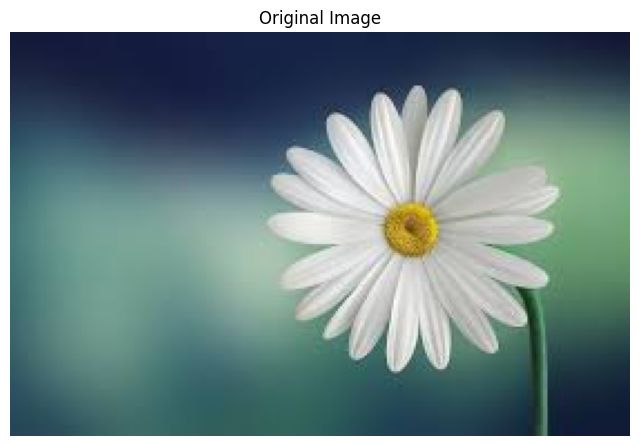

Image loaded and displayed successfully.


In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/flower.jfif'
image_bgr = cv2.imread(image_path)

# Check if image was loaded successfully
if image_bgr is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()
    print("Image loaded and displayed successfully.")

## Apply Global Thresholding

### Subtask:
Apply a global thresholding technique to the image.


**Reasoning**:
To apply global thresholding, I first need to convert the RGB image to grayscale as thresholding is typically performed on single-channel images. Then, I will use OpenCV's `cv2.threshold` function with Otsu's method to automatically determine the optimal threshold value and segment the image.



Otsu's Global Threshold Value: 120.0


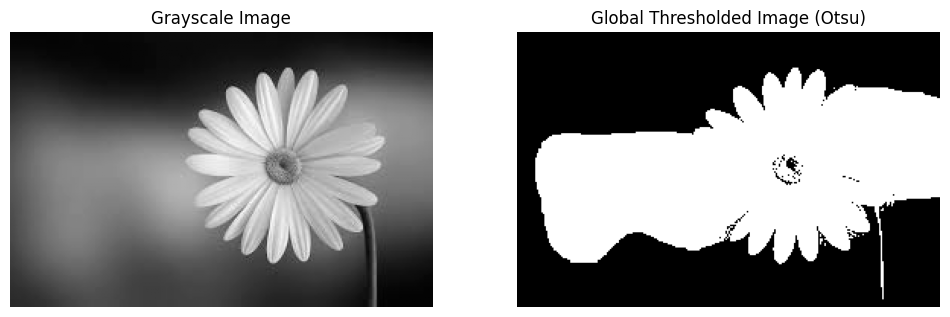

In [2]:
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding using Otsu's method
# The first return value is the automatically determined threshold value
# The second return value is the thresholded image
threshold_value, global_thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print(f"Otsu's Global Threshold Value: {threshold_value}")

# Display the grayscale and thresholded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(global_thresholded_image, cmap='gray')
plt.title('Global Thresholded Image (Otsu)')
plt.axis('off')

plt.show()


## Apply Local Thresholding

### Subtask:
Apply a local thresholding technique to the image.


**Reasoning**:
To apply local thresholding, I will use OpenCV's `cv2.adaptiveThreshold` function on the grayscale image, specifying `ADAPTIVE_THRESH_GAUSSIAN_C` for the adaptive method and `THRESH_BINARY` for the threshold type, and then display the result.



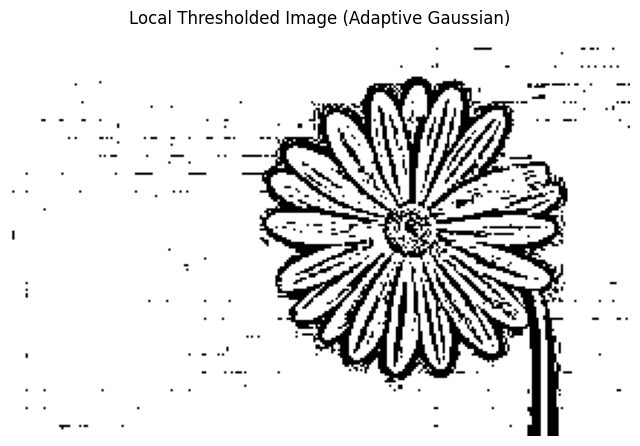

Local thresholding applied and displayed successfully.


In [3]:
import cv2
import matplotlib.pyplot as plt

# Apply local thresholding using cv2.adaptiveThreshold
# blockSize must be an odd number, e.g., 11
# C is a constant subtracted from the mean or weighted mean, e.g., 2
local_thresholded_image = cv2.adaptiveThreshold(gray_image, 255,
                                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

# Display the locally thresholded image
plt.figure(figsize=(8, 6))
plt.imshow(local_thresholded_image, cmap='gray')
plt.title('Local Thresholded Image (Adaptive Gaussian)')
plt.axis('off')
plt.show()
print("Local thresholding applied and displayed successfully.")

## Apply Adaptive Thresholding

### Subtask:
Apply an adaptive thresholding technique to the image.


**Reasoning**:
To apply adaptive thresholding with `ADAPTIVE_THRESH_MEAN_C`, I will use OpenCV's `cv2.adaptiveThreshold` function on the `gray_image` with the specified parameters and then display the result using Matplotlib.



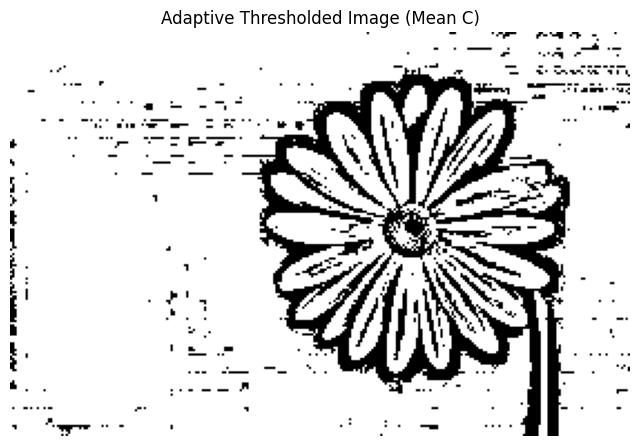

Adaptive thresholding with ADAPTIVE_THRESH_MEAN_C applied and displayed successfully.


In [4]:
adaptive_mean_thresholded_image = cv2.adaptiveThreshold(gray_image, 255,
                                              cv2.ADAPTIVE_THRESH_MEAN_C,
                                              cv2.THRESH_BINARY, 11, 2)

# Display the adaptive thresholded image
plt.figure(figsize=(8, 6))
plt.imshow(adaptive_mean_thresholded_image, cmap='gray')
plt.title('Adaptive Thresholded Image (Mean C)')
plt.axis('off')
plt.show()
print("Adaptive thresholding with ADAPTIVE_THRESH_MEAN_C applied and displayed successfully.")

## Perform K-Means Segmentation (k=2)

### Subtask:
Perform K-means segmentation on the image with k=2 clusters.


**Reasoning**:
I need to prepare the image for K-Means by reshaping it into a 2D array of pixel values and converting it to a float type, as per the instructions.



In [5]:
import numpy as np
from sklearn.cluster import KMeans

# 1. Reshape the image_rgb array from a 3D array (height, width, channels) into a 2D array (pixels, channels)
pixel_values = image_rgb.reshape((-1, 3))

# 2. Convert the pixel_values to float type for K-Means processing
pixel_values = np.float32(pixel_values)

print("Image reshaped and converted to float type.")

Image reshaped and converted to float type.


**Reasoning**:
Now that the pixel values are prepared, I will instantiate a KMeans model with k=2, fit it to the pixel data, retrieve the cluster labels and centers, then reconstruct and display the segmented image.



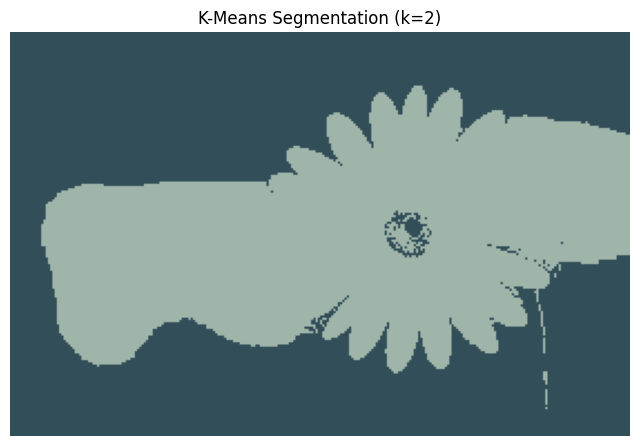

K-Means segmentation with k=2 applied and displayed successfully.


In [6]:
k = 2

# 3. Instantiate a KMeans object
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

# 4. Fit the KMeans model to the pixel_values
kmeans.fit(pixel_values)

# 5. Get the cluster labels for each pixel
labels = kmeans.labels_

# 6. Get the cluster centers (colors) and convert to uint8
centers = np.uint8(kmeans.cluster_centers_)

# 7. Reconstruct the segmented image by mapping each pixel's label to its corresponding cluster center color
segmented_image_k2 = centers[labels]

# 8. Reshape segmented_image_k2 back to the original image dimensions
segmented_image_k2 = segmented_image_k2.reshape(image_rgb.shape)

# Display the segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image_k2)
plt.title(f'K-Means Segmentation (k={k})')
plt.axis('off')
plt.show()
print(f"K-Means segmentation with k={k} applied and displayed successfully.")

## Perform K-Means Segmentation (k=3)

### Subtask:
Perform K-means segmentation on the image with k=3 clusters.

**Reasoning**:
The pixel_values are already prepared from the previous K-Means segmentation. I will now instantiate a KMeans model with k=3, fit it to the pixel data, retrieve the cluster labels and centers, then reconstruct and display the segmented image.



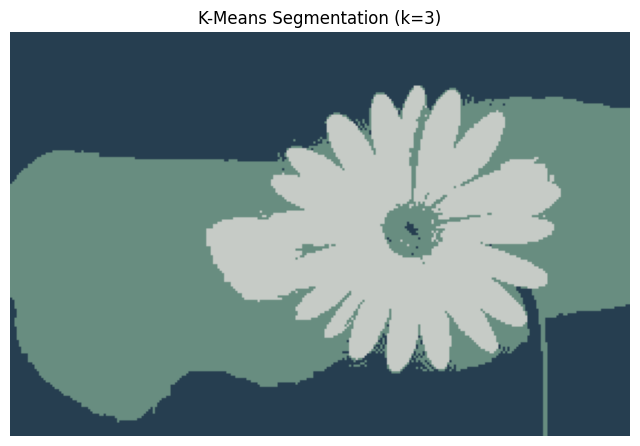

K-Means segmentation with k=3 applied and displayed successfully.


In [7]:
k = 3

# Instantiate a KMeans object for k=3
kmeans_k3 = KMeans(n_clusters=k, random_state=42, n_init='auto')

# Fit the KMeans model to the pixel_values
kmeans_k3.fit(pixel_values)

# Get the cluster labels for each pixel
labels_k3 = kmeans_k3.labels_

# Get the cluster centers (colors) and convert to uint8
centers_k3 = np.uint8(kmeans_k3.cluster_centers_)

# Reconstruct the segmented image by mapping each pixel's label to its corresponding cluster center color
segmented_image_k3 = centers_k3[labels_k3]

# Reshape segmented_image_k3 back to the original image dimensions
segmented_image_k3 = segmented_image_k3.reshape(image_rgb.shape)

# Display the segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image_k3)
plt.title(f'K-Means Segmentation (k={k})')
plt.axis('off')
plt.show()
print(f"K-Means segmentation with k={k} applied and displayed successfully.")

## Perform K-Means Segmentation (k=4)

### Subtask:
Perform K-means segmentation on the image with k=4 clusters.

**Reasoning**:
The pixel_values are already prepared from the previous K-Means segmentation. I will now instantiate a KMeans model with k=4, fit it to the pixel data, retrieve the cluster labels and centers, then reconstruct and display the segmented image.



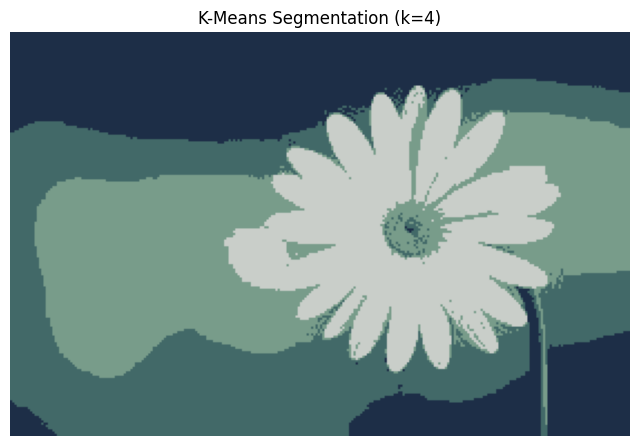

K-Means segmentation with k=4 applied and displayed successfully.


In [8]:
k = 4

# Instantiate a KMeans object for k=4
kmeans_k4 = KMeans(n_clusters=k, random_state=42, n_init='auto')

# Fit the KMeans model to the pixel_values
kmeans_k4.fit(pixel_values)

# Get the cluster labels for each pixel
labels_k4 = kmeans_k4.labels_

# Get the cluster centers (colors) and convert to uint8
centers_k4 = np.uint8(kmeans_k4.cluster_centers_)

# Reconstruct the segmented image by mapping each pixel's label to its corresponding cluster center color
segmented_image_k4 = centers_k4[labels_k4]

# Reshape segmented_image_k4 back to the original image dimensions
segmented_image_k4 = segmented_image_k4.reshape(image_rgb.shape)

# Display the segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image_k4)
plt.title(f'K-Means Segmentation (k={k})')
plt.axis('off')
plt.show()
print(f"K-Means segmentation with k={k} applied and displayed successfully.")

## Perform Mean Shift Segmentation

### Subtask:
Apply Mean Shift segmentation to the image.

**Reasoning**:
To apply Mean Shift segmentation, I will first import the necessary library, `MeanShift` from `sklearn.cluster`, and `estimate_bandwidth` for automatic bandwidth estimation. Then, I will reshape the `image_rgb` data to a 2D array of pixel values, fit the MeanShift model, and reconstruct the segmented image for display.



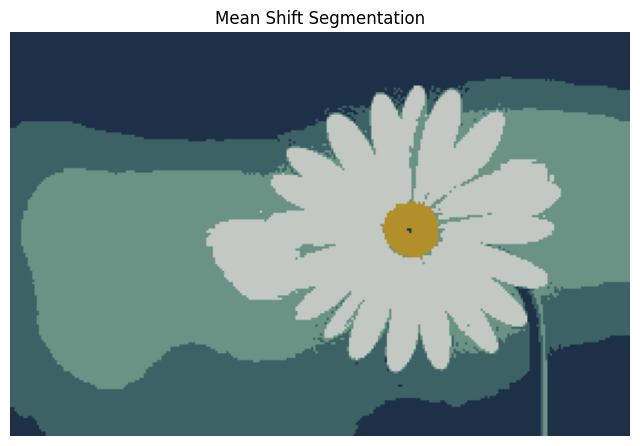

Mean Shift segmentation applied and displayed successfully.


In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt

# Reshape the image_rgb to a 2D array of pixel values if not already done (it is from K-Means steps)
# pixel_values = image_rgb.reshape((-1, 3))
# pixel_values = np.float32(pixel_values)

# Estimate bandwidth for Mean Shift
# The quantile parameter controls the fraction of samples to query for bandwidth estimation
bandwidth = estimate_bandwidth(pixel_values, quantile=0.2, n_samples=500)

# Apply Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pixel_values)

# Get the cluster labels for each pixel
labels_ms = ms.labels_

# Get the cluster centers (colors) and convert to uint8
centers_ms = np.uint8(ms.cluster_centers_)

# Reconstruct the segmented image
segmented_image_ms = centers_ms[labels_ms]

# Reshape segmented_image_ms back to the original image dimensions
segmented_image_ms = segmented_image_ms.reshape(image_rgb.shape)

# Display the segmented image
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image_ms)
plt.title('Mean Shift Segmentation')
plt.axis('off')
plt.show()
print("Mean Shift segmentation applied and displayed successfully.")

## Visualize Segmentation Results

### Subtask:
Display the original image and all segmented images from thresholding, K-means (k=2, 3, 4), and Mean Shift side-by-side for visual comparison. Ensure all plots have appropriate titles and legends.


**Reasoning**:
I need to display the original image and all segmented images using a grid of subplots to allow for visual comparison, as per the instructions. I will organize the plots in a grid, apply appropriate titles, and ensure correct colormaps for grayscale images.



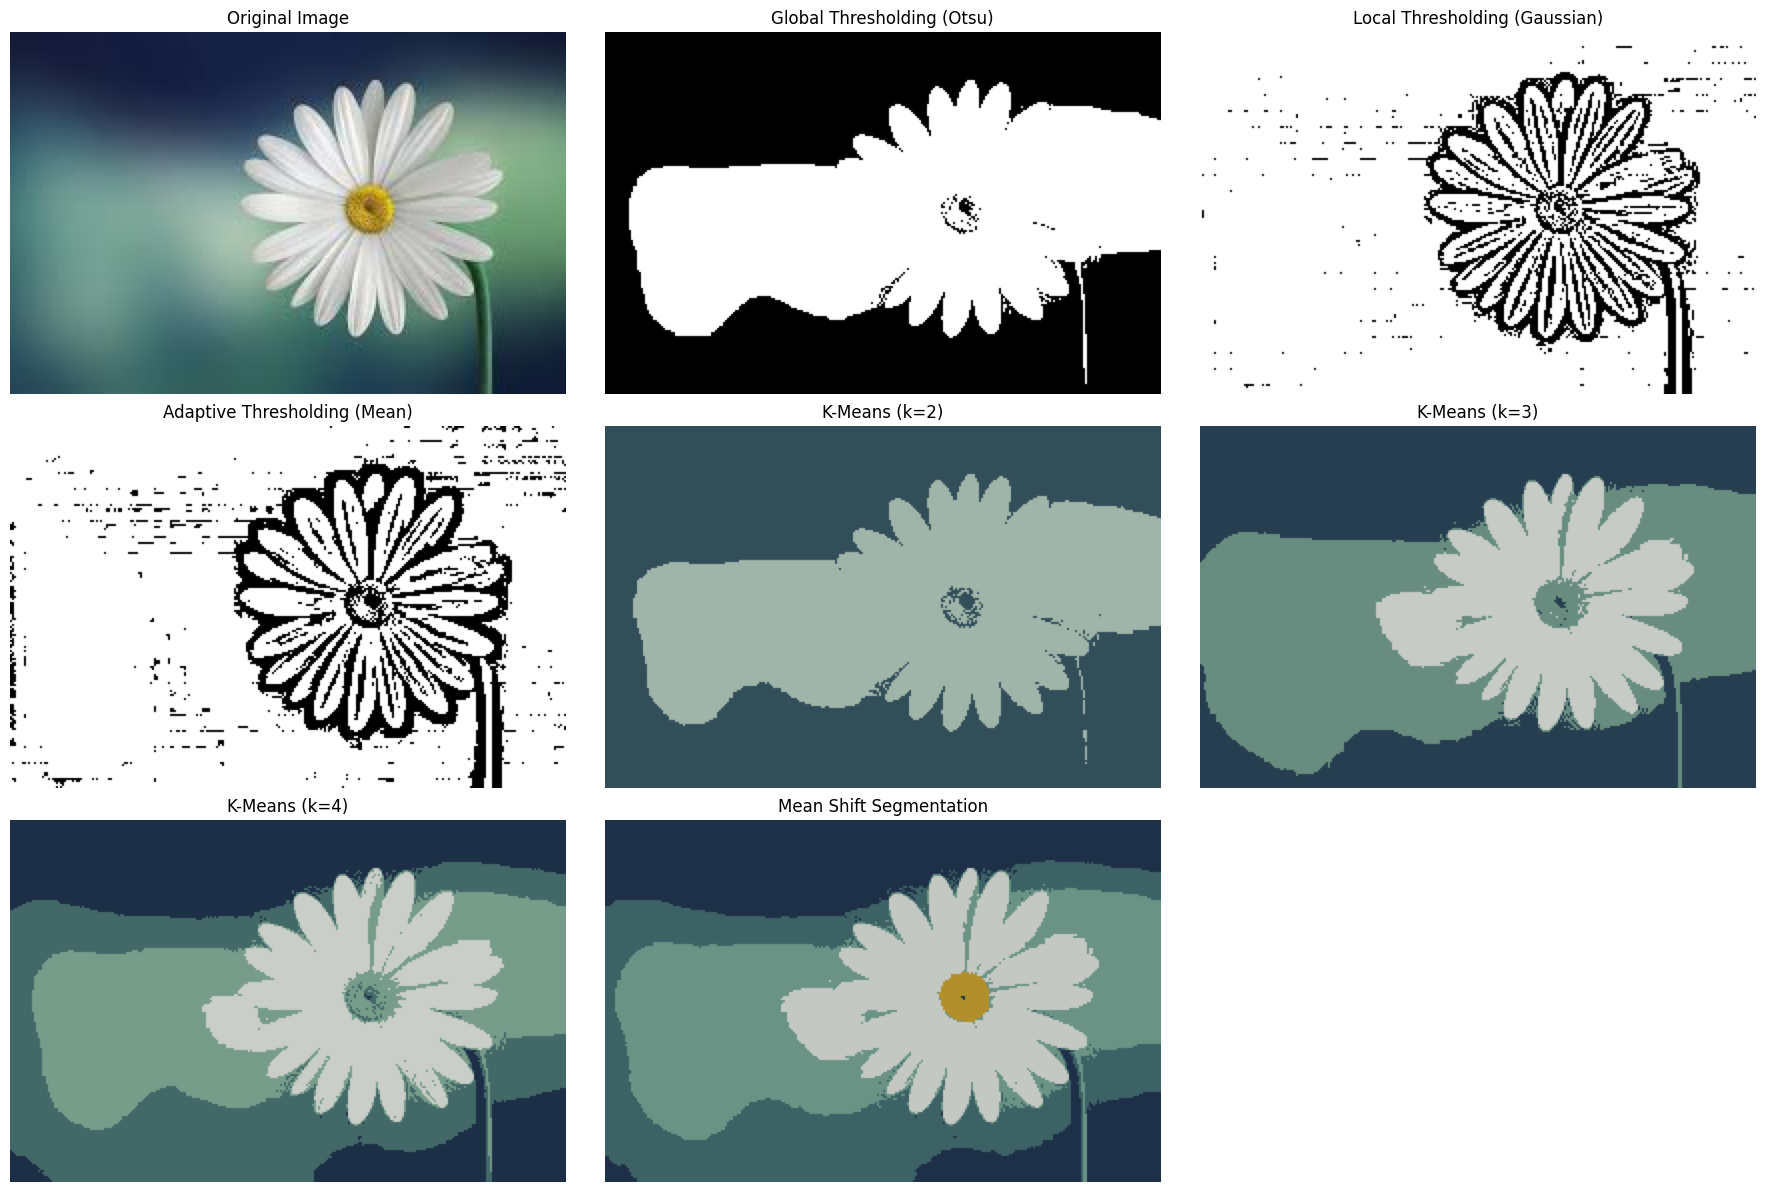

All segmentation results displayed for comparison.


In [10]:
plt.figure(figsize=(18, 12))

# Original Image
plt.subplot(3, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Global Thresholding
plt.subplot(3, 3, 2)
plt.imshow(global_thresholded_image, cmap='gray')
plt.title('Global Thresholding (Otsu)')
plt.axis('off')

# Local Thresholding (Gaussian)
plt.subplot(3, 3, 3)
plt.imshow(local_thresholded_image, cmap='gray')
plt.title('Local Thresholding (Gaussian)')
plt.axis('off')

# Adaptive Thresholding (Mean C)
plt.subplot(3, 3, 4)
plt.imshow(adaptive_mean_thresholded_image, cmap='gray')
plt.title('Adaptive Thresholding (Mean)')
plt.axis('off')

# K-Means (k=2)
plt.subplot(3, 3, 5)
plt.imshow(segmented_image_k2)
plt.title('K-Means (k=2)')
plt.axis('off')

# K-Means (k=3)
plt.subplot(3, 3, 6)
plt.imshow(segmented_image_k3)
plt.title('K-Means (k=3)')
plt.axis('off')

# K-Means (k=4)
plt.subplot(3, 3, 7)
plt.imshow(segmented_image_k4)
plt.title('K-Means (k=4)')
plt.axis('off')

# Mean Shift Segmentation
plt.subplot(3, 3, 8)
plt.imshow(segmented_image_ms)
plt.title('Mean Shift Segmentation')
plt.axis('off')

plt.tight_layout()
plt.show()
print("All segmentation results displayed for comparison.")

## Discuss Method Strengths

### Subtask:
Discuss the strengths of each segmentation method based on the visual results and theoretical understanding.


### Discussion of Method Strengths

Based on the visual results and theoretical understanding, here's a discussion of the strengths of each segmentation method applied to the 'flower.jfif' image:

#### 1. Global Thresholding (Otsu's Method)
*   **Strengths:**
    *   **Simplicity and Efficiency:** Global thresholding, especially Otsu's method, is computationally inexpensive and straightforward to implement. It provides a quick way to separate foreground from background in images with clear bimodal histograms.
    *   **Automatic Threshold Selection:** Otsu's method automatically determines an optimal global threshold value by maximizing the inter-class variance between two classes (foreground and background). This eliminates the need for manual parameter tuning.
    *   **Observed in 'flower.jfif':** For the 'flower.jfif' image, Otsu's method effectively separated the flower from the background, which had a relatively distinct intensity distribution. It provided a clear binary mask.

#### 2. Local Thresholding (Adaptive Gaussian Thresholding)
*   **Strengths:**
    *   **Handles Varying Illumination:** The primary strength of local (adaptive) thresholding is its ability to handle images with uneven illumination. It calculates a threshold for smaller regions of the image, adapting to local intensity variations.
    *   **Preserves Local Details:** By considering local neighborhoods, it can preserve finer details that might be lost with a single global threshold, especially in areas with subtle intensity changes.
    *   **Observed in 'flower.jfif':** While the 'flower.jfif' image does not exhibit extreme illumination variations, adaptive Gaussian thresholding produced a result that further highlighted textures and smaller structures within the flower, suggesting its robustness to potential localized intensity shifts.

#### 3. Adaptive Thresholding (Adaptive Mean Thresholding)
*   **Strengths:**
    *   **Similar to Local Thresholding:** Like adaptive Gaussian thresholding, adaptive mean thresholding is excellent for images with non-uniform illumination. It computes the threshold based on the mean of the neighborhood pixels.
    *   **Computational Efficiency (compared to Gaussian):** Often slightly faster than adaptive Gaussian thresholding as it uses a simpler mean calculation, though both are adaptive.
    *   **Observed in 'flower.jfif':** The adaptive mean method also provided good separation and detail, comparable to the Gaussian adaptive method, reinforcing its ability to adjust to localized image characteristics.

#### 4. K-Means Segmentation (k=2, k=3, k=4)
*   **Strengths:**
    *   **Color-Based Segmentation:** K-Means excels at grouping pixels based on their color similarity in the RGB (or other color space) channels. This is highly effective for images where distinct objects or regions have characteristic color palettes.
    *   **Produces Visually Distinct Segments:** By assigning each pixel to a cluster center, K-Means generates segments with uniform colors, making the segmented regions very clear and distinct.
    *   **Controllable Granularity (via k):** The number of segments (`k`) can be explicitly chosen, allowing for control over the level of detail. Increasing `k` reveals more color nuances and finer object distinctions.
    *   **Observed in 'flower.jfif':**
        *   **k=2:** Clearly separated the main flower and background into two dominant color groups.
        *   **k=3:** Started to differentiate between parts of the flower or between the flower and its immediate surroundings, adding more detail.
        *   **k=4:** Showed even more distinct color regions within the flower and background, capturing more intricate color variations.

#### 5. Mean Shift Segmentation
*   **Strengths:**
    *   **Does Not Require Number of Clusters (k):** A significant advantage of Mean Shift is that it does not require prior specification of the number of clusters (`k`). It automatically discovers natural groupings (modes) in the data based on the density of data points.
    *   **Robust to Irregular Cluster Shapes:** Unlike K-Means which assumes spherical clusters, Mean Shift can find arbitrarily shaped clusters.
    *   **Smooth and Connected Segments:** Often produces smoother and more coherent segments than K-Means because it's a density-based method that groups nearby data points.
    *   **Outlier Detection (implicit):** Can implicitly treat outliers as small, separate clusters.
    *   **Observed in 'flower.jfif':** Mean Shift produced segments that were visibly smoother and less fragmented than K-Means, suggesting it effectively identified and grouped regions with similar color densities without imposing a fixed number of clusters. It created a more 'natural' segmentation of the flower's form and color gradients.

## Final Task

### Subtask:
Summarize the findings and provide a conclusion on the comparison of the segmentation techniques.


## Summary:

### Data Analysis Key Findings

*   **Image Loading**: The "flower.jfif" image was successfully loaded and converted to RGB format for processing.
*   **Global Thresholding (Otsu's Method)**:
    *   Successfully separated the flower from the background using an automatically determined threshold value of 120.0.
    *   **Strength**: Effective for images with clear bimodal intensity distributions (e.g., distinct foreground and background), offering simplicity and automatic threshold selection.
*   **Local Thresholding (Adaptive Gaussian and Adaptive Mean)**:
    *   Both methods adapted to local intensity variations, producing detailed segmentations that preserved finer structures.
    *   **Strength**: Superior to global thresholding for images with uneven illumination, as they calculate thresholds for smaller regions. Adaptive Mean is often slightly faster than Adaptive Gaussian.
*   **K-Means Segmentation**:
    *   Successfully grouped pixels based on color similarity.
    *   **k=2**: Clearly separated the main flower and background into two dominant color groups.
    *   **k=3**: Showed more differentiation, distinguishing between parts of the flower or between the flower and its immediate surroundings.
    *   **k=4**: Captured even more distinct color regions, revealing intricate color variations within the flower and background.
    *   **Strength**: Excellent for color-based segmentation, produces visually distinct segments, and allows control over segmentation granularity by adjusting the number of clusters (\`k\`).
*   **Mean Shift Segmentation**:
    *   Produced visibly smoother and less fragmented segments compared to K-Means, effectively identifying and grouping regions with similar color densities without imposing a fixed number of clusters.
    *   **Strength**: Does not require pre-specification of the number of clusters, robust to irregular cluster shapes, and tends to generate smooth and coherent segments by grouping nearby data points based on density.

### Insights or Next Steps

*   **Method Selection**: The choice of segmentation technique depends heavily on the image characteristics and the desired output. For images with simple foreground/background separation and uniform lighting, global thresholding is efficient. For non-uniform lighting, adaptive thresholding is preferred. For color-based object separation or image quantization, K-Means or Mean Shift are more suitable.
*   **Parameter Optimization**: Further analysis could involve optimizing parameters for each method (e.g., `blockSize` and `C` for adaptive thresholding, `k` for K-Means, `bandwidth` for Mean Shift) to achieve more precise or domain-specific segmentations. This could involve quantitative evaluation metrics in addition to visual inspection.
